# Яндекс Недвижимость

### Описание проекта

**Цель проекта:**

Обработать и исследовать исходные данные, чтобы установить параметры необходимые для определения цены.

**Исходные данные:**

Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических 
данных.

**Описание данных:**

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` — число балконов;
* `ceiling_height` — высота потолков (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населённого пункта;
* `open_plan` — свободная планировка (булев тип);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);
* `rooms` — число комнат;
* `studio` — квартира-студия (булев тип);
* `total_area` — площадь квартиры в квадратных метрах (м²);
* `total_images` — число фотографий квартиры в объявлении.

### Структура проекта

* 1. Загрузка и изучение общей информации датасета
* 2. Предобработка данных
    
    * 2.1 Пропуски значений
    * 2.2 Дубликаты
    * 2.3 Изменение типов данных
* 3. Добавление дополнительных данных в таблицу
* 4. Исследовательский анализ данных
    * 4.1 Изучение параметров: площадь, цена, число комнат, высота потолков
    * 4.2 Изучение времени продажи квартиры
    * 4.3 Поиск редких и выбивающихся значений
    * 4.4 Поиск факторов влияющих на стоимость квартиры
    * 4.5 Исследование стоимости квадратного метра в различных районах
    * 4.6 Определение границы центрального района в Санкт-Петербурге
    * 4.7 Исследование квартир в центральном районе Санкт-Петербурга
* 5. Общий вывод

## 1. Загрузка и изучение общей информации датасета

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# открываем файл с данными

pth1 = 'C:\\Users\\Anna\\Desktop\\Python\\Yandex Praktikum\\Datasets\\project_3\\real_estate_data.csv'
pth2 = '/datasets/real_estate_data.csv'

if os.path.exists(pth1):
    realty = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    realty = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')

In [3]:
# выводим первые 10 строк таблицы и сводную информацию о ней
display(realty.head(10))
realty.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# выводим статистику по числовым столбцам
realty[['last_price','total_area','rooms','ceiling_height','floors_total','living_area','floor','kitchen_area']].describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area
count,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000
mean,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807
std,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000
25%,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000
75%,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000


**Выводы**

- В предоставленных данных 22 колонки, содержащие 4 типа `int64`, `float64`, `bool` и `object`. 
- Только в 8-ми колонках информация заполнена полностью, в остальных есть отсутствующая информация в разных объемах. Например, в колонке `'is_apartment'` заполнены лишь 2775 строк из 23699.
- Выявлены аномальные значения, требующие проверки:
    
    * Стоимость квартиры 12 тысяч рублей.
    * Количество комнат 0.
    * Площадь в 900 квадратных метров.
    * Высота потолков в 1 и 100 метров.
    * Зданий с высотой 60 этажей нет в СПБ.

- Имеются столбцы, где необходимо исправить типы данных для дальшейнего использования в нашем анализе.
- Столбец `'locality_name'` следует изучить на повторяющиеся по смыслу названия, чтобы исключить повторения.

## 2. Предобработка данных

### 2.1 Пропуски значений

Сначала посчитаем сколько в таблице пропущенных значений.

In [5]:
# подсчет пропущенных значений
realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

* Рассмотрим высоту потолков в столбце `'ceiling_height'`.

In [6]:
print(f"Количество пропущенных значений: {realty['ceiling_height'].isna().sum()}")
print(f"Доля пропущенных значений: {realty['ceiling_height'].isna().mean():.2%}")

Количество пропущенных значений: 9195
Доля пропущенных значений: 38.80%


Пропущено много данных (почти 39%), удалить их нельзя. Составители заявлений могли не внести эти данные, или информация утеряна в результатее сбоя системы при загрузке / выгрузке базы данных.

Пропуски можно было бы заменить на значения из других объявлений в тех же домах, но информации об адресах квартир в нет.
Замена значений на средние или медианные может внести искажения в распределение данных. При возможности, необходимо восстановить данные по адресам домов или обратиться к владельцам данных.

На данном этапе оставим значения пустыми.

---

* Рассмотрим количество этажей в доме в столбце `'floors_total'`.

In [7]:
print(f"Количество пропущенных значений: {realty['floors_total'].isna().sum()}")
print(f"Доля пропущенных значений: {realty['floors_total'].isna().sum() / realty.shape[0] * 100}")
display(realty.loc[realty['floors_total'].isna()].head(10))

Количество пропущенных значений: 86
Доля пропущенных значений: 0.36288450989493226


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,NaN,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,NaN,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,NaN,NaN,22.20,6,NaN,...,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Пропусков немного. Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).

Данные также могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить при наличии адреса дома, или при обращении к владельцам данных.
Замена небольшого колличества пропусков средним или медианным значением не внесёт сильного искажения в распределение данных. Но такие замены могут внести искажения во влияние расположения квартир на их стоимость (последний этаж - стоимость). 

На данном этапе удалим строки с пропусками.

In [8]:
realty = realty.loc[~(realty['floors_total'].isna())]
print('Колличество оставшихся записей:', realty.shape[0])

Колличество оставшихся записей: 23613


---

* Рассмотрим жилую площадь в столбце `'living_area'`.

In [9]:
print(f"Количество пропущенных значений: {realty['living_area'].isna().sum()}")
print(f"Доля пропущенных значений: {realty['living_area'].isna().sum() / realty.shape[0] * 100}")

Количество пропущенных значений: 1870
Доля пропущенных значений: 7.919366450683945


Пропусков в данном столбце достаточно много (около 8% от общего числа данных). Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу.

Найдем коэффициент жилой площади от всей площади и через него запоненим пропуски.

In [10]:
# коэффициент жилой площади
living_ratio = realty['living_area'].mean() / realty['total_area'].mean()
realty['living_area'].fillna(realty['total_area'] * living_ratio, inplace=True)
print(f"Пропуски по столбцу 'living_area': {realty['living_area'].isna().sum()}")

Пропуски по столбцу 'living_area': 0


То же самое проделаем для кухонной площади по столбцу `'kitchen_area'`.

In [11]:
# коэффициент кухонной площади
kitchen_ratio = realty['kitchen_area'].mean() / realty['total_area'].mean()
realty['kitchen_area'].fillna(realty['total_area'] * kitchen_ratio, inplace=True)
print(f"Пропуски по столбцу 'kitchen_area': {realty['kitchen_area'].isna().sum()}")

Пропуски по столбцу 'kitchen_area': 0


---

* Рассмотрим принадлежность к аппартаментам в столбце `'is_apartment'`.

In [12]:
print(f"Количество пропущенных значений: {realty['is_apartment'].isna().sum()}")
print(f"Доля пропущенных значений: {realty['is_apartment'].isna().sum() / realty.shape[0] * 100}")

Количество пропущенных значений: 20838
Доля пропущенных значений: 88.24799898361071


Предположим, что пропуск значения в `'is_apartment'` означает, что помещение не принадлежит к аппартаментам, просто заявитель не стал указывать значение "False". Тогда все пропуски заменим на булево значение False.

In [13]:
# замена пропусков в 'is_apartment' на False
realty['is_apartment'].fillna(False, inplace=True)
print(f"Пропуски по столбцу 'is_apartment': {realty['is_apartment'].isna().sum()}")

Пропуски по столбцу 'is_apartment': 0


---

* Рассмотрим количество балконов в столбце `'balcony'`.

In [14]:
print(f"Количество пропущенных значений: {realty['balcony'].isna().sum()}")
print(f"Доля пропущенных значений: {realty['balcony'].isna().sum() / realty.shape[0] * 100}")

Количество пропущенных значений: 11480
Доля пропущенных значений: 48.61728708762122


Предположим, что пропуск значения в `'balcony'` означает, что в помещении нет балконов, просто заявитель не стал указывать 0 и просто пропустил данное поле. То есть все пропуски заменим на значение 0.

In [15]:
# замена пропусков  в 'balcony' на 0
realty['balcony'].fillna(0, inplace=True)
print(f"Пропуски по столбцу 'balcony': {realty['balcony'].isna().sum()}")

Пропуски по столбцу 'balcony': 0


---

* Рассмотрим местоположение квартиры в столбце `'locality_name'`.

In [16]:
print(f"Количество пропущенных значений: {realty['locality_name'].isna().sum()}")
print(f"Доля пропущенных значений: {realty['locality_name'].isna().sum() / realty.shape[0] * 100}")

Количество пропущенных значений: 48
Доля пропущенных значений: 0.2032778554186253


Пропусков немного. Данные также могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. 

Эти данные важны, так как имет место влияние месторасположения квартир на их стоимость. Отфильтруем квартиры, расположенные в Санкт-Петербурге и возьмем разброс удаленности от центра. Все квартиры, попадающие в этот разброс, также расположены в Санкт-Петербурге. Построим гистаграмму распределения `'cityCenters_nearest'` при `'locality_name'` = "Санкт-Петербург".

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

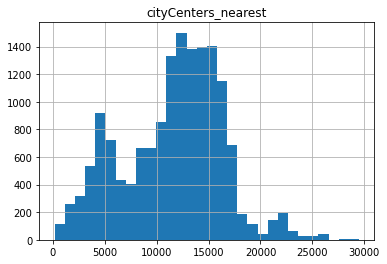

In [17]:
# гистограмма распределения удаленности от центра, квартир, расположенных в Санкт-Петербурге
realty.query('locality_name == "Санкт-Петербург"').hist('cityCenters_nearest', bins=30)

Так как город имеет границы неправильной формы, значания удаленности в 25 и 30 км могут выходить за пределы города, в зависимости от того, в какую сторону мерить. Основная масса квартир удалена от центра в пределах 20 км. Заменим значение `'locality_name'` в таких объявлениях на "Санкт-Петербург". Остальные строки удалим.

In [18]:
# функция замены пустого наименования месторасположения квартиры на "Санкт-Петербург", 
# при условии, что удаленность от центра <= 20 000 м (20 км).
def locality_name_fillna(row):
    max_cityCenters_nearest = 20000
    if pd.isnull(row['locality_name']):
        if row['cityCenters_nearest'] <= max_cityCenters_nearest:
            return 'Санкт-Петербург'
    return row['locality_name']

realty['locality_name'] = realty.apply(locality_name_fillna, axis=1)

In [19]:
# удаление оставшихся пустых значений
realty = realty.loc[~(realty['locality_name'].isna())]
realty.reset_index(drop=True, inplace=True)
print('Колличество оставшихся записей:', realty.shape[0])

Колличество оставшихся записей: 23602


---

* Рассмотрим расстояние до ближайшего парка и водоема по столбцам `'parks_around3000'`, `'parks_nearest'`, `'ponds_around3000'`, `'ponds_nearest'`.

Данные по расстоянию до ближайшего парка и по расстоянию до ближайшего водоёма получены автоматически на основе картографических данных, поэтому предположим, что пропуски получены из-за невозможности посчитать расстояние по какой-либо причине (например, радиус поиска меньше, чем расстояние до ближайшего парка/водоёма).

Заменим в таком случае пропуски на 0, но только при условии, что в столбцах число парков/водоёмов в радиусе 3км тоже пропуск или 0.

In [20]:
# объединяем данные, где в parks_nearest стоит пропуск и в parks_around3000 пустые значения, либо < 1.
park_condition = (realty['parks_nearest'].isna() & (realty['parks_around3000'].isna() | (realty['parks_around3000'] < 1.0)))
# в объединенных данных заполняем пропуски 0
realty.loc[park_condition, ['parks_nearest', 'parks_around3000']] = realty.loc[park_condition, ['parks_nearest', 'parks_around3000']].fillna(0)

In [21]:
# объединяем данные, где в ponds_nearest стоит пропуск и в ponds_around3000 пустые значения, либо < 1.
pond_condition = (realty['ponds_nearest'].isna() & (realty['ponds_around3000'].isna() | (realty['ponds_around3000'] < 1.0)))
# в объединенных данных заполняем пропуски 0
realty.loc[pond_condition, ['ponds_nearest', 'ponds_around3000']] = realty.loc[pond_condition, ['ponds_nearest', 'ponds_around3000']].fillna(0)

In [22]:
# проверка пропущенных значений
print('Осталось пропущенных значений:')
realty[['parks_nearest', 'parks_around3000', 'ponds_nearest', 'ponds_around3000']].isna().sum()

Осталось пропущенных значений:


parks_nearest       0
parks_around3000    0
ponds_nearest       0
ponds_around3000    0
dtype: int64

---

* Рассмотрим расстояние до центра и аэропорта в столбцах `'cityCenters_nearest'`и `'airports_nearest'`.

In [23]:
print(f"Количество пропущенных значений по столбцу 'cityCenters_nearest': {realty['cityCenters_nearest'].isna().sum()}")
print(f"Доля пропущенных значений: {realty['cityCenters_nearest'].isna().sum() / realty.shape[0] * 100}")

Количество пропущенных значений по столбцу 'cityCenters_nearest': 5501
Доля пропущенных значений: 23.30734683501398


In [24]:
print(f"Количество пропущенных значений по столбцу 'airports_nearest': {realty['airports_nearest'].isna().sum()}")
print(f"Доля пропущенных значений: {realty['airports_nearest'].isna().sum() / realty.shape[0] * 100}")

Количество пропущенных значений по столбцу 'airports_nearest': 5524
Доля пропущенных значений: 23.404796203711552


Пропусков в данных столбцах достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).

Данные по расстоянию до ближайшего парка и по расстоянию до ближайшего водоёма получены автоматически на основе картографических данных, поэтому предположим, что пропуски получены из-за невозможности посчитать расстояние по какой-либо причине или значения могли быть утеряны в результате сбоя при загрузке данных в базу.

Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.

---

* Рассмотрим колличество дней, которое объявление было размещено. Столбец `'days_exposition'`.

In [25]:
print(f"Количество пропущенных значений: {realty['days_exposition'].isna().sum()}")
print(f"Доля пропущенных значений: {realty['days_exposition'].isna().sum() / realty.shape[0] * 100}")

Количество пропущенных значений: 3171
Доля пропущенных значений: 13.435302093042962


Пропусков в данном столбце достаточно много (порядка 13% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд.).

Данные могли быть утеряны в результате сбоя системы при выгрузке базы.
Также возможно информация не была внесена системой, так как объявление не было снято в момент выгрузки данных.
Информацию можно восстановить при обращении к владельцам данных.

На данном этапе предположим, что объявления с пропусками не были сняты, заполним пропуски 0.

In [26]:
realty['days_exposition'].fillna(0, inplace=True)

Отобразим конечный результат работы с пропусками.

In [27]:
realty.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9110
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5524
cityCenters_nearest     5501
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

Мы заменили пропуски во всех столбцах, кроме:

* `'ceiling_height'`: исказит результаты дальнейшего анализа, значения этого параметра квартиры рассматриваются далее подробнее
* `'airports_nearest'`: предположим, что пропуски вызваны тем, что поблизости нет аэропорта, оставим пропуски
* `'cityCenters_nearest'`: предположим, что пропуски вызваны тем, что квартира слишком далеко от центра, оставим пропуски

### 2.2 Дубликаты
Проверим наличие явных дубликатов.

In [28]:
realty.duplicated().sum()

0

Явных дубликатов не обнаруежено. Исследуем столбец `'locality_name'` на предмет неявных дубликатов.

In [29]:
realty['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В колонке с названием населенных пунктов, есть двоякое написание "поселка" через "е" и через "ё". Для исключения всех дубликатов приведем наименования к именам нарицательным.

In [30]:
# функция приведения наименований населенных пунктов к именам нарицательным
def replace_bad_locality_name(locality_name):
    bad_list = [
    'городской поселок',
    'городской посёлок',
    'коттеджный поселок',
    'коттеджный посёлок',
    'поселок городского типа',
    'посёлок городского типа',
    'поселок станции',
    'посёлок при железнодорожной станции',
    'посёлок станции',
    'садоводческое некоммерческое товарищество',
    'деревня',
    'поселок',
    'посёлок',
    'село'
    ]
    for i in bad_list:
        if i in locality_name:
            return locality_name.split()[-1]
    return locality_name
 
realty['locality_name'] = realty['locality_name'].apply(replace_bad_locality_name)

In [31]:
# проверка значений после применения функции
realty['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Бор', 'Гатчина', 'Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'Девяткино', 'Металлострой', 'Лебяжье',
       'Сиверский', 'Молодцово', 'Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Свет', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка', 'Бугры',
       'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа', 'Нурма',
       'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск'

Неявные дубликаты удалены, можно приступать к следующему этапу обработки.

### 2.3 Изменение типов данных

Изменим тип данных у цены и общей площади, большая точность нам не нужна, а целые числа читать легче. 
А также приведем дату в корректный формат.

In [32]:
realty['last_price'] = realty['last_price'].astype('int')
realty['total_area'] = realty['total_area'].astype('int')
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format = '%Y-%m-%d')

Заменим тип данных описывающих количество:

* этажей в доме
* балконов в доме
* парков в радиусе 3 км 
* водоёмов в радиусе 3 км
* дней экспозиции

на тип данных целого числа.

In [33]:
realty['floors_total'] = realty['floors_total'].astype('int')
realty['balcony'] = realty['balcony'].astype('int')
realty['parks_around3000'] = realty['parks_around3000'].astype('int')
realty['ponds_around3000'] = realty['ponds_around3000'].astype('int')
realty['days_exposition'] = realty['days_exposition'].astype('int')

Заменим поле `is_apartment` на булев тип.

In [34]:
realty['is_apartment'] = realty['is_apartment']==True

Отобразим конечный результат после предобработки.

In [35]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23602 entries, 0 to 23601
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23602 non-null  int64         
 1   last_price            23602 non-null  int64         
 2   total_area            23602 non-null  int64         
 3   first_day_exposition  23602 non-null  datetime64[ns]
 4   rooms                 23602 non-null  int64         
 5   ceiling_height        14492 non-null  float64       
 6   floors_total          23602 non-null  int64         
 7   living_area           23602 non-null  float64       
 8   floor                 23602 non-null  int64         
 9   is_apartment          23602 non-null  bool          
 10  studio                23602 non-null  bool          
 11  open_plan             23602 non-null  bool          
 12  kitchen_area          23602 non-null  float64       
 13  balcony         

**Выводы**

* Данные в таблице содержат больщое колличество пропусков.
* Пропуски были проанализированы и по возможности заполнены (например пропущенные значения в колличестве балконов заменены на 0).
* Возможные причины пропусков приведены для каждой переменной. Основными причинами являются отсутствие информации при заполнении объявления и сбои в работе системы при загрузке/выгрузке базы данных.
* Типы данных были преобразованы в соответствии с описанием таблицы и смыслом хранимой информации.

## 3. Добавление дополнительных данных в таблицу

* Посчитаем цену квадратного метра квартиры.

Для этого разделим цену квартиры `'last_price'` на общую площадь квартиры `'total_area'`. Округлим полученное значение до одного знака после запятой. Результат запишем в столбец `'meter_price'`.

In [36]:
# округление произведём с помощью метода round()
realty['meter_price'] = round(realty['last_price'] / realty['total_area'], 1)

---

* Посчитаем день недели, месяц и год публикации объявления.

Для этого воспользуемся методами `dt.weekday`, `dt.month` и `dt.year` соответственно.
Дату публикации возьмём из столбца `'first_day_exposition'`.
Полученные данные сохраним в столбцах `'publish_weekday'`, `'publish_month'`, `'publish_year'`.

In [37]:
realty['publish_weekday'] = realty['first_day_exposition'].dt.weekday
realty['publish_month'] = realty['first_day_exposition'].dt.month
realty['publish_year'] = realty['first_day_exposition'].dt.year

---

* Создадим категорию для этажа квартиры.

Данные возьмём из столбцов `'floor'` для этажа квартиры и `'floors_total'` колличества этажей в доме.
Результат сохраним в столбце `'floor_category'`.

Для определения категории создадим функцию `floor_category()`. На вход функции поступает строка с данными, внутри сравнивается этаж квартиры с колличеством этажей в доме, и на выход поступает название категории. Далее с помощью метода `apply'` применяем созданную функцию ко всем строкам таблицы.

In [38]:
#  создадим функцию `floor_category(row)` для нахождения категории этажа квартиры
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

# с помощью метода apply применяем функцию floor_category ко всем строкам таблицы 'realty'
realty['floor_category'] = realty.apply(floor_category, axis=1)

---

* Определим соотношение жилой и общей площади квартиры, а также отношение площади кухни к общей.

Данные возьмём из столбцов `'living_area'`, `'total_area'` и `'kitchen_area'`.
Результаты вычислений сохраним в столбцах `'living_area_ratio'` и `'kitchen_area_ratio'` соответственно.
Результаты округлим до 2 знаков после запятой.

In [39]:
realty['living_area_ratio'] = round(realty['living_area'] / realty['total_area'], 2)
realty['kitchen_area_ratio'] = round(realty['kitchen_area'] / realty['total_area'], 2)

In [40]:
# Конечный вид таблицы:
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,publish_weekday,publish_month,publish_year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,0,120370.4,3,3,2019,другой,0.47,0.23
1,7,3350000,40,2018-12-04,1,NaN,11,18.600000,1,False,...,0,0.0,81,83750.0,1,12,2018,первый,0.46,0.28
2,10,5196000,56,2015-08-20,2,NaN,5,34.300000,4,False,...,2,574.0,558,92785.7,3,8,2015,другой,0.61,0.15
3,0,64900000,159,2015-07-24,3,NaN,14,90.810749,9,False,...,3,234.0,424,408176.1,4,7,2015,другой,0.57,0.18
4,2,10000000,100,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121,100000.0,1,6,2018,другой,0.32,0.41
5,10,2890000,30,2018-09-10,1,NaN,12,14.400000,5,False,...,0,0.0,55,96333.3,0,9,2018,другой,0.48,0.30
6,6,3700000,37,2017-11-02,1,NaN,26,10.600000,6,False,...,0,0.0,155,100000.0,3,11,2017,другой,0.29,0.39
7,5,7915000,71,2019-04-18,2,NaN,24,40.893394,22,False,...,0,0.0,0,111478.9,3,4,2019,другой,0.58,0.27
8,20,2900000,33,2018-05-23,1,NaN,27,15.430000,26,False,...,0,0.0,189,87878.8,2,5,2018,другой,0.47,0.27
9,18,5400000,61,2017-02-26,3,2.50,9,43.600000,7,False,...,0,0.0,289,88524.6,6,2,2017,другой,0.71,0.11


**Выводы**

* Метрики были успешно посчитаны, исходя из условия задания, и добавлены в основную таблицу.
* Названия для новых столбцов выбраны, исходя из информации, которая в них хранится.

## 4. Исследовательский анализ данных

### 4.1 Изучение параметров: площадь, цена, число комнат, высота потолков

* Рассмотрим площадь квартир в столбце `'total_area'`. Построим гистограмму для данного параметра.

In [41]:
# выведем информацию о распределении значений в параметре total_area методом describe()
display(realty['total_area'].describe())
# найдём 99-й квантиль значений total_area с помощью метода .quantile(0.99)
print('99-й перцентиль значений total_area:', round(realty['total_area'].quantile(0.99), 1))

count    23602.000000
mean        60.105923
std         35.659026
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

99-й перцентиль значений total_area: 197.0


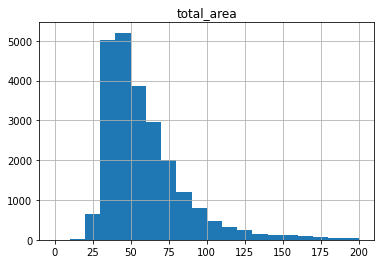

In [42]:
# построим гистаграмму распределения 'total_area' методом hist().
# разделим гистограмму на 20 участков (параметр bins=20), ограничимся значением 'total_area' < 200 (м²) 
realty.hist('total_area', bins=20, range = (0, 200))
plt.show()

* Распределение значений параметра `'total_area'` близко к распределению Пуассона, без аномальных пиков.
* Минимальная площадь 12 м², вполне правдоподобное значение, возможно продаётся комната.
* Максимальное значение - 900 м². Достаточно высокое, но также правдоподобно.
* 99% значений укладывается в отрезке 12 - 200 м². Остальные случаи можно считать выбросами.
* Медианное значение (52.0) меньше среднего (60.1), следовательно, данные немного смещены влево. Это нормально: колличество небольших квартир больше, но очень большие по площади вносят вклад в смещение данных.

---

* Рассмотрим цену квартир в столбце `'last_price'`. Построим гистограмму для данного параметра. Для удобства чтения уберем 6 знаков от показателя цены, т.е. данные будут представлены в млн. руб.

In [43]:
# выведем информацию о распределении значений в параметре last_price методом describe()
display((realty['last_price'] / 1000000).describe())
# найдём 99-й квантиль значений last_price с помощью метода .quantile(0.99)
print('99-й перцентиль значений last_price:', round((realty['last_price'] / 1000000).quantile(0.99), 1))

count    23602.000000
mean         6.541096
std         10.903900
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

99-й перцентиль значений last_price: 36.0


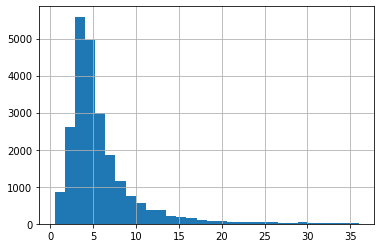

In [44]:
# построим гистаграмму распределения 'last_price' методом hist().
# разделим гистограмму на 30 участков (параметр bins=30), ограничим значения 0.5 < 'last_price' < 36 (.99-й квантиль)
(realty['last_price'] / 1000000).hist(bins=30, range = (0.5, 36))
plt.show()

* Распределение значений параметра `'last_price'` близко к распределению Пуассона, без аномальных пиков.
* Минимальная цена 12 190 руб. - слишком маленькое значение, поэтому мы ограничили диапазон цен снизу значением в 500 тыс. руб.
* Максимальное значение - 763 млн. руб. Достаточно высокое, но правдоподобное значение.
* 99% значений меньше 36 млн. руб. Остальные случаи можно считать выбросами.
* Медианное значение 4.65 млн. руб. меньше среднего 6.54 млн. руб., следовательно, данные смещены влево. Это нормально: колличество дешёвых квартир больше, но очень дорогая недвижимость вносит вклад в смещение данных.

---

* Рассмотрим число комнат в столбце `'rooms'`. Построим гистограмму для данного параметра.

In [45]:
# выведем информацию о распределении значений в параметре rooms методом describe()
display(realty['rooms'].describe())
# найдём 99-й квантиль значений rooms с помощью метода .quantile(0.99)
print('99-й перцентиль значений rooms:', round(realty['rooms'].quantile(0.99), 1))

count    23602.000000
mean         2.071138
std          1.078495
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

99-й перцентиль значений rooms: 5.0


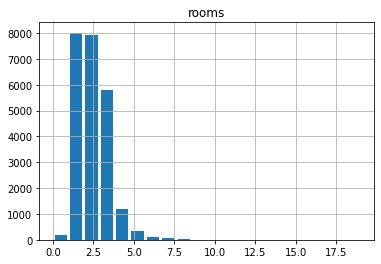

In [46]:
# построим гистаграмму распределения 'rooms' методом hist().
# разделим гистограмму на 22 участка (параметр bins=22)
realty.hist('rooms', bins=20, rwidth=0.8)
plt.show()

* Распределение значений параметра rooms близко к распределению Пуассона, без аномальных пиков.
* Аномальные нулевые значения могут быть связаны с открытой планировкой квартиры. Количество значений не критичное, они не внесут большого отклонения в распределение.
* Максимальное значение - 19. Достаточно высокое, но правдоподобно.
* 99% значений меньше 5. Остальные случаи можно считать выбросами.
* Медианное и среднее значения равны 2, данные практически не смещены, так как абсолютное большинство квартир имеют 1, 2 или 3 комнаты. Разброс значений очень мал.

---

* Рассмотрим высоту потолков в столбце `'ceiling_height'`. Построим гистограмму для данного параметра.

In [47]:
# выведем информацию о распределении значений в параметре ceiling_height методом describe()
display(realty['ceiling_height'].describe())
# найдём 99-й квантиль значений ceiling_height с помощью метода .quantile(.99)
print('99.5-й перцентиль значений ceiling_height:', round(realty['ceiling_height'].quantile(0.99), 1))

count    14492.000000
mean         2.771513
std          1.261574
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

99.5-й перцентиль значений ceiling_height: 3.8


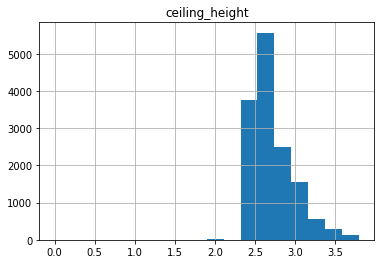

In [48]:
# построим гистаграмму распределения 'ceiling_height' методом hist().
# разделим гистограмму на 18 участков (параметр bins=18), 
# ограничим значения 'ceiling_height' < 3.8 (0.99-й квантиль)
realty.hist('ceiling_height', bins=18, range = (0, 3.8))
plt.show()

На гистограмме видно влияние выбросов с минимальными значениями, отбросим их. Для этого посчитаем 0.5-й и 99.5-й квантили.

In [49]:
# найдём 99.5-й квантиль значений ceiling_height с помощью метода .quantile(0.995)
print('99.5-й перцентиль значений ceiling_height:', round(realty['ceiling_height'].quantile(0.995), 1))
# найдём 0.5-й квантиль значений ceiling_height с помощью метода .quantile(0.05)
print('0.5-й перцентиль значений ceiling_height:', round(realty['ceiling_height'].quantile(0.005), 1))

99.5-й перцентиль значений ceiling_height: 4.1
0.5-й перцентиль значений ceiling_height: 2.5


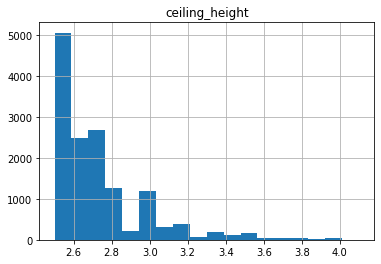

In [50]:
# построим гистаграмму распределения 'ceiling_height' методом hist().
# разделим гистограмму на 18 участков (параметр bins=18), 
# ограничим значения 'ceiling_height' (2.5, 4.1), отбросим 1% аномально высоких и низких значений
realty.hist('ceiling_height', bins=18, range = (2.5, 4.1))
plt.show()

* Распределение значений параметра `ceiling_height` близко к распределению Пуассона. Есть небольшое аномальное поведение значении 3 м. Это может быть объяснено особенностью заполнения данных (округляли высоту до 3 м, когда реальная высота 2.9 или 3.1 м).
* Максимальное значение - 100 м, ошибочное, но таких значений мало: 99% значений меньше 4 м. Остальные случаи можно считать выбросами, они не внесут отклонение в распределение.
* Минимальное значение - 1 м, скорее всего ошибочное, но таких значений мало: 99% значений больше 2.5 м. Остальные случаи можно считать выбросами, они не внесут большое отклонение в распределение.
* Медианное и среднее значения равны 2.65 и 2.77 соответственно. Данные практически не смещены, так как абсолютное большинство квартир имеют высоту потолков 2.5 - 3.5 м. Разброс значений небольшой. Отсюда могут быть и небольшие аномалии в распределении Пуассона.

### 4.2 Изучение времени продажи квартиры

Время продажи квартиры находится в параметре `days_exposition`.

Для начала определим 1-й и 99-й перцентили распределения, чтобы не включать редкие значения в гистограмму. При этом исключим данные равные 0, так как мы предположили, что это еще не проданные квартиры и мы не можем использовать их в исследовании этого вопроса.

In [51]:
# найдём 99-й квантиль значений days_exposition с помощью метода .quantile(0.99)
print('99-й перцентиль значений days_exposition:', round(realty.query('days_exposition != 0')['days_exposition'].quantile(0.99), 1))
# найдём 1-й квантиль значений days_exposition с помощью метода .quantile(0.01)
print('1-й перцентиль значений days_exposition:', round(realty.query('days_exposition != 0')['days_exposition'].quantile(0.01), 1))

99-й перцентиль значений days_exposition: 1067.0
1-й перцентиль значений days_exposition: 4.0


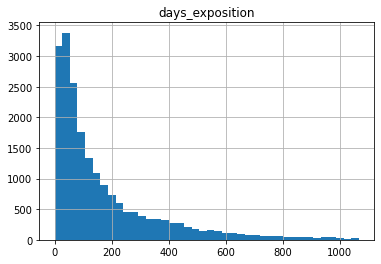

In [52]:
# построим гистаграмму распределения 'days_exposition' методом hist().
# разделим гистограмму на 40 участков (параметр bins=40),
# ограничим гистограмму значениями 0 - 1067
realty.query('days_exposition != 0').hist('days_exposition', bins=40, range=(0,1067))
plt.show()

Теперь рассчитаем среднее, медианное значения, а также посмотрим на распределение значений с помощью метода describe()

In [53]:
print('Среднее значение времени продажи:', round(realty.query('days_exposition != 0')['days_exposition'].mean(),0))
print('Медианное значение времени продажи:', round(realty.query('days_exposition != 0')['days_exposition'].median(),0))
realty.query('days_exposition != 0')['days_exposition'].describe()

Среднее значение времени продажи: 181.0
Медианное значение времени продажи: 95.0


count    20431.000000
mean       180.927267
std        219.725798
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

* Среднее значение в 2 раза больше медианного. Данные сильно смещены влево.
* Это означает, что большинство квартир проданы за сравнительно небольшой срок (45 - 232 дней), но есть очень долгие объявления, вносящие смещение в данные.
* 1% объявлений были сняты за 4 и меньше дней. Можно считать, что это необычно короткий срок.
Теперь определим, какие сроки можно считать очень долгими. Для начала построим ящик с усами boxplot().

<AxesSubplot:>

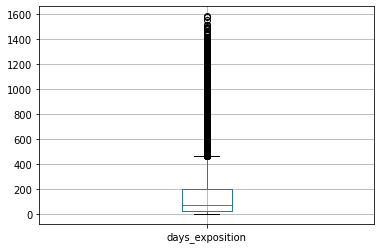

In [54]:
realty.boxplot('days_exposition')

* Можно оценить, что верхняя граница, после которой данные можно считать выбросами, находится в районе 500 дней.
* Время продажи квартиры больше 500 дней можно считать необычно долгим.

### 4.3 Поиск редких и выбивающихся значений

В пунктах 4.1 и 4.2 мы изучили такие параметры как: площадь, цена, число комнат, высота потолков и время продажи квартиры. Среди них мы обнаружили выбивающиеся значения. Исключим данные в которых:
* площадь квартиры более 200 м;
* высота потолков менее 2.5 м и более 4.1 м;
* количество комнат более 5;
* стоимость квартиры менее 500 тыс. руб. и более 36 млн. руб.;
* время продажи более 500 дней.

In [55]:
min_extreme_ceiling_height = realty.query('ceiling_height < 2.5')
max_extreme_ceiling_height = realty.query('ceiling_height > 4.1')

good_realty = realty.query(
    'total_area <= 200 and '
    'ceiling_height not in @min_extreme_ceiling_height["ceiling_height"] and '
    'ceiling_height not in @max_extreme_ceiling_height["ceiling_height"] and '
    'rooms <= 5 and '
    'last_price <= 36000000 and last_price >= 500000 and '
    'days_exposition <= 500'
)

Обновим индексы в таблице после удаления строк методом reset_index()

In [56]:
good_realty = good_realty.reset_index(drop=True)

In [57]:
print('После очистки осталось {} объявлений'.format(good_realty.shape[0]))

После очистки осталось 21356 объявлений


In [58]:
# Код ревьюера
len(good_realty)/len(realty)

0.904838573002288

### 4.4 Поиск факторов влияющих на стоимость квартиры

* Рассмотрим влияние на стоимость `last_price`: площади квартиры `total_area`, числа комнат `rooms`, удалённости от центра `cityCenters_nearest`, этажа квартиры `floor_cat`, даты размещения: дня недели, месяца и года (параметры `publish_weekday`, `publish_month` и `publish_year` соответственно).
* Построим графики зависимостей данных параметров (scatterplot), с помощью метода plot()
* Также определим коэффициент корреляции Пирсона для каждой пары параметров.


Создадим вспомогательную функцию для построения графиков scatterplot.

In [59]:
def last_price_scatter(column, need_median=False):
    """
    input: column (str) - название столбца для оси X графика
           xrange (tuple) - пределы значений в столбце column для построения графика
           need_median (bool) - флаг для построения кривой медиан (для каегориальных данных по оси X)
    output: None
    Функция строит scatteplot зависимости цены за квартиру 'last_price' от параметра column. 
    Дополнительно при need_median=True функция считает медианное значение 'last_price' для каждого значения column
    и строит кривую median в тех же осях координат.
    """
    ax = good_realty.plot(x = column,
                          y = 'last_price',
                          kind = 'scatter',         # тип графика
                          style = 'o',              # отображение данных точками
                          alpha = 0.3,              # прозрачность (для визуализации плотности данных)
                          figsize = (8, 4),         # размер графика
                          grid = True               # отобразить сетку
                         )
    if need_median:
        # сгруппируем объявления по column и найдём медианные значения стоимости квартир для каждой группы
        (good_realty
         .groupby(column)['last_price']
         .agg(['median'])
         # отобразим медианы стоимости квартир для разных групп
         .plot(ax = ax,
               y = 'median',
               style = '-or',
               legend = True,          # отобразить подпись графика
               label = 'median',    # название кривой
               grid = True              # отобразить сетку
              )
        )      
        
    plt.show()

#### Зависимость цены от площади квартиры

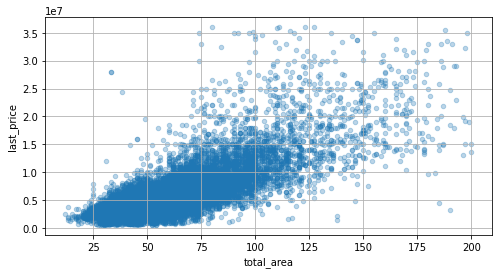

Коэффициент корреляции Пирсона между last_price и total_area: 0.774


In [60]:
# построим график функцией last_price_scatter()
last_price_scatter('total_area')

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и total_area:', \
      round(good_realty['last_price'].corr(good_realty['total_area']), 3))


* По графику видно, что в среднем стоимость квартиры растёт с увеличением общей площади.
* Коэффициент корреляции Пирсона 0.774 также подтверждает положительную зависимость. Значение коэффициента говорит об умеренной зависимости.

#### Зависимость цены от числа комнат

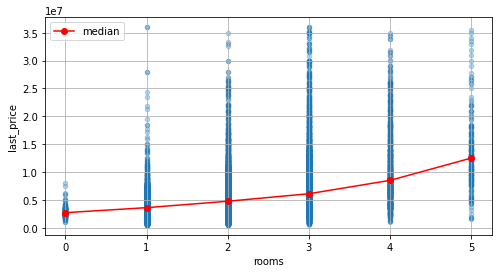

Коэффициент корреляции Пирсона между last_price и rooms: 0.468


In [61]:
# построим график функцией last_price_scatter()
last_price_scatter('rooms', need_median=True)

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и rooms:', \
      round(good_realty['last_price'].corr(good_realty['rooms']), 3))

* По графику видно, что в среднем стоимость квартиры растёт с увеличением колличества комнат.
* Коэффициент корреляции Пирсона 0.468 также подтверждает положительную зависимость. Значение коэффициента низкое, зависимость между параметрами достаточно слабая.

#### Зависимость цены от удалённости от центра

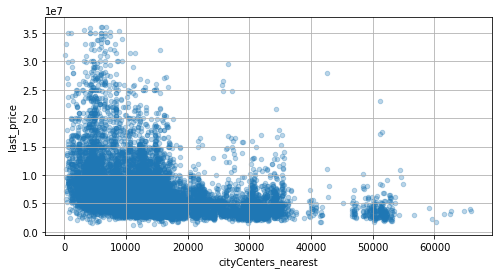

Коэффициент корреляции Пирсона между last_price и cityCenters_nearest: -0.332


In [62]:
# построим график функцией last_price_scatter()
last_price_scatter('cityCenters_nearest')

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и cityCenters_nearest:', \
      round(good_realty['last_price'].corr(good_realty['cityCenters_nearest']), 3))

* По графику видно, что в среднем стоимость квартиры падает с увеличением расстояния до центра.
* Коэффициент корреляции Пирсона -0.332 также подтверждает отрицательную зависимость. Значение коэффициента низкое, зависимость между параметрами достаточно слабая.

#### Зависимость цены от этажа

<AxesSubplot:xlabel='floor_category'>

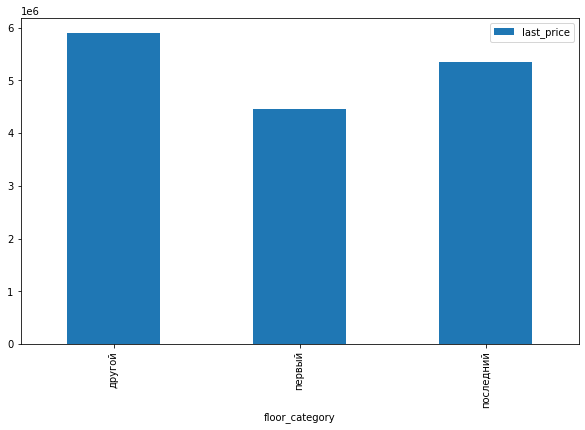

In [63]:
#Построим график методом plot
(good_realty
    .pivot_table(index='floor_category', values='last_price', aggfunc='mean')
    .plot(kind='bar', y='last_price', figsize=(10,6))
)

* По графику видно, что квартиры расположенные последних этажах стоят дешевле, чем квартиры расположенные на других этажах, а на первом этаже самые дешевые квартиры.

#### Зависимость цены от даты размещения

1) Зависимость `last_price` от `publish_weekday`.

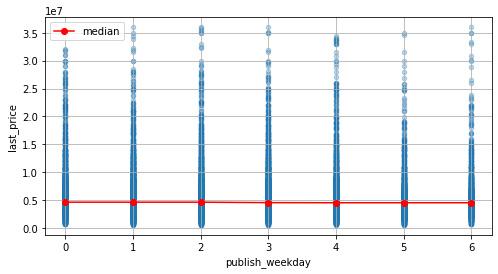

In [64]:
# построим график функцией last_price_scatter()
last_price_scatter('publish_weekday', need_median=True)

* По графику видно, что в среднем стоимость квартиры никак не зависит от дня недели размещения объявления.

---

2) Зависимость `last_price` от `publish_month`.

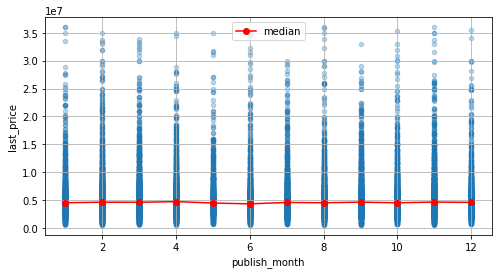

In [65]:
# построим график функцией last_price_scatter()
last_price_scatter('publish_month', need_median=True)

* По графику видно, что в среднем стоимость квартиры никак не зависит от месяца размещения объявления.

---

3) Зависимость `last_price` от `publish_year`.

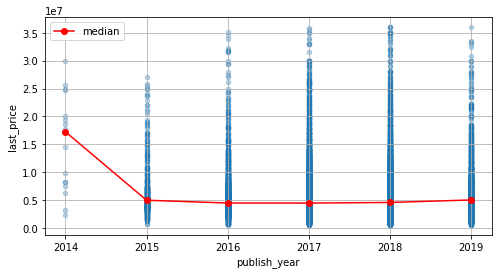

In [66]:
# построим график функцией last_price_scatter()
last_price_scatter('publish_year', need_median=True)

* По графику видно, что с 2014 по 2015 год наблюдалось снижение стоимости квартир.

### 4.5 Исследование стоимости квадратного метра в различных районах

Сгруппируем объявления по названию населённого пункта, посчитаем колличество записей в каждой группе, а также медианное значение стоимости квадратного метра. После этого отсортируем результат по убыванию колличества записей и выберем первые 10 групп. Результат запишем в переменную `localities`.

Выведем таблицу на экран в порядке убывания стоимости квадратного метра.

In [67]:
localities = (good_realty
              .groupby('locality_name')['meter_price']
              .agg(['count', 'mean'])
              .sort_values(by='count', ascending=False)
              .head(10)
             )
display(localities.sort_values('mean', ascending=False))

,count,mean
locality_name,,
Санкт-Петербург,14051,111613.564401
Пушкин,333,103616.696096
Кудрово,432,96039.603935
Парголово,310,90611.782903
Мурино,550,86901.198545
Шушары,416,78915.038462
Колпино,321,75612.294081
Гатчина,282,69248.447518
Всеволожск,365,69040.806849


**Вывод:**
* Самое дорогое жильё в Санкт-Петербурге;
* Самое дешёвое жилье в Выборге.

### 4.6 Определение границы центрального района в Санкт-Петербурге

Выделим квартиры в Санкт-Петербурге (`'locality_name'`) методом `loc` и сохраним их в переменной `spb_realty`.
Создадим столбец `'dist_center'` с расстоянием до центра в километрах, округлим до целых значений.
Посчитаем среднюю цену для каждого километра. Построим график зависимости цены от удалённости от центра.
Определим границу, где график сильно меняется — это и будет центральная зона.

In [68]:
# методом query получим срез данных, результат запишем в таблицу real_estate_peter
# сбросим индексы методом reset_index(drop=True)
spb_realty = (good_realty
                     .query('locality_name == "Санкт-Петербург"')
                     .reset_index(drop=True)
                    )

# в dist_center запишем расстояние до центра в километрах, округлим значение методом round()
spb_realty['dist_center'] = round(spb_realty['cityCenters_nearest'] / 1000, 0)

Построим график зависимости цены от удалённости от центра.

<AxesSubplot:xlabel='dist_center', ylabel='last_price'>

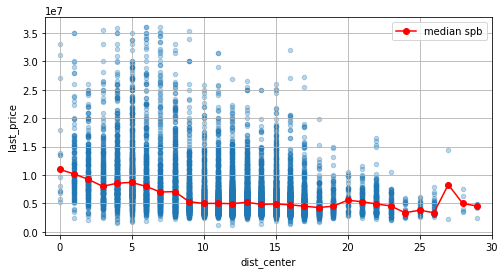

In [69]:
ax = spb_realty.plot(x = 'dist_center',
                    y = 'last_price',
                    kind = 'scatter',         # тип графика
                    style = 'o',              # отображение данных точками
                    alpha = 0.3,              # прозрачность (для визуализации плотности данных)
                    figsize = (8, 4),         # размер графика
                    xlim = (-1,30),
                    grid = True
                    )

# сгруппируем данные по расстоянию до центра, посчитаем медианное значение цены за квадратный метр
(spb_realty
         .groupby('dist_center')['last_price']
         .agg(['median'])
         # на тех же осях отобразим кривую изменения медианного значения цены за квадратный метр от расстояния до центра.
         .plot(ax=ax,                   # копируем оси с предыдущего графика
               y = 'median',            # медианы стоимости квадратного метра по оси y
               style = '-or',           # стиль кривой - красная линия с точками в местах расчётов
               legend = True,              # отобразить подпись графика
               label = 'median spb',    # название кривой               
               grid = True              # отобразить сетку на графике
              )
)

* Скорость роста цены квартиры начинает увеличиваться при расстоянии до центра <= 8 км. Будем считать границу центрадьного района за 8 км.

### 4.7 Исследование квартир в центральном районе Санкт-Петербурга

Сохраним в таблице `spb_realty_center` объявления о квартирах в центре Санкт-петербурга.

In [70]:
# Сделаем срез данных из таблицы `spb_realty`, где расстояние до центра до 8 километров.
# результат запишем в таблицу `spb_realty_center`
spb_realty_center = (spb_realty
                      .query('dist_center <= 8')
                      .reset_index(drop=True)
                     )

Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

Создадим вспомогательную функцию для построения двух гистограмм (для всех объявлений и квартир в центре Санкт-Петербурга) в одной системе координат для наглядного сравнения различных параметров.

In [71]:
def show_histograms(column, bins):
    """
    input: column (str) - название столбца для построения гистограммы
           bins (int)   - колличество ячеек для гистограмм
    output: None
    Функция строит две гистограммы из таблиц real_estate и real_estate_center для столбца column
    в одной системе координат. Гистограммы отображают плотности распределения значений для наглядности.
    """
    ax = good_realty.plot(kind = 'hist',
                          y = column,
                          histtype = 'step',       # данный тип удобен для сравнения двух гистограмм
                          bins = bins,
                          alpha = 0.5,
                          linewidth = 2,           # ширина графика
                          grid = True,
                          density = True,          # отобразить плотность распределения данных
                          legend = True,           # отобразить пояснение для графиков
                          label = column + ' all'  # строка подписи для графиков
                         )
    spb_realty_center.plot(kind = 'hist',
                            y = column,
                            histtype = 'step',
                            ax = ax,               # отобразить график в осях предыдущей гистограммы
                            bins = bins,
                            alpha = 0.5,
                            linewidth = 2,
                            grid = True,
                            density = True,
                            legend = True,
                            label = column + ' center'
                           )
    # density=True - необходимо для отображения двух гистограмм в одной системе координат.
    plt.show()

count    3288.000000
mean       76.580900
std        33.051289
min        12.000000
25%        52.000000
50%        71.000000
75%        95.000000
max       198.000000
Name: total_area, dtype: float64

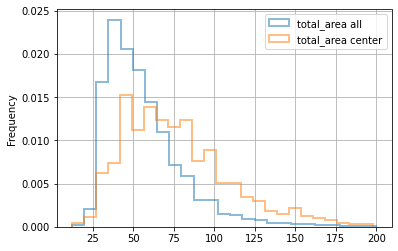

In [72]:
# методом describe посмотрим на численное распределение площади 'total_area' для квартир в центре Санкт-Петербурга
display(spb_realty_center['total_area'].describe())

# построим гистаграмму распределения 'total_area' методом hist().
# разделим гистограмму на 25 участков
show_histograms('total_area', bins=25)

* Среднее и медианное значения `total_area` для квартир в центре равны соответственно 76.6 и 71.0.
* На гистограммах хорошо видно смещение в сторону больших значений для квартир в центре (с обоих сторон от пиков гистограмм).

count      3288.000000
mean     131219.204106
std       49001.943947
min       15384.600000
25%      100000.000000
50%      121961.100000
75%      148753.675000
max      848484.800000
Name: meter_price, dtype: float64

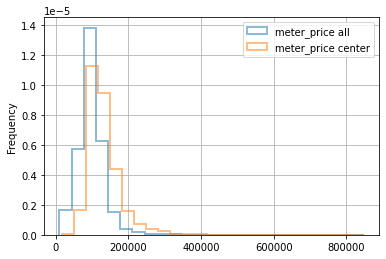

In [73]:
# посмотрим на численное распределение цены за квадратный метр 'meter_price' для квартир в центре Санкт-Петербурга
display(spb_realty_center['meter_price'].describe())

# построим гистаграмму распределения 'meter_price' методом hist().
# разделим гистограмму на 25 участков
show_histograms('meter_price', bins=25)

* Среднее и медианное значения `meter_price` для квартир в центре равны соответственно 131 тыс. и 122 тыс. руб. соответственно.
* На гистограммах также видно небольшое смещение в сторону больших значений для квартир в центре (с обоих сторон от пиков гистограмм).

count    3288.000000
mean        2.494830
std         1.056354
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

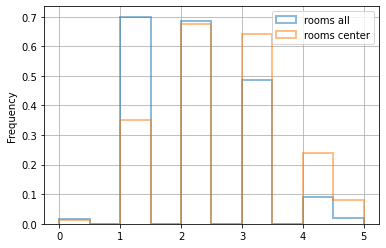

In [74]:
# посмотрим на численное распределение колличества комнат 'rooms' для квартир в центре Санкт-Петербурга
display(spb_realty_center['rooms'].describe())

# построим гистаграмму распределения 'rooms' методом hist().
# разделим гистограмму на 10 участков
show_histograms('rooms', bins=10)

* Среднее и медианное значения `rooms` для квартир в центре равны 2.5 и 2.
* На гистограммах также хорошо видно смещение в сторону больших значений для квартир в центре (с обоих сторон от пиков гистограмм).

count    2126.000000
mean        3.011524
std         0.323890
min         2.500000
25%         2.760000
50%         3.000000
75%         3.200000
max         4.100000
Name: ceiling_height, dtype: float64

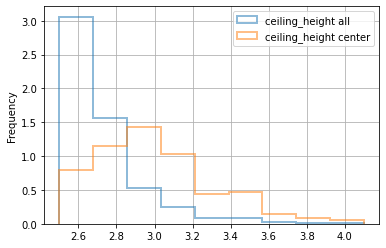

In [75]:
# посмотрим на численное распределение высоты потолков 'ceiling_height' для квартир в центре Санкт-Петербурга
display(spb_realty_center['ceiling_height'].describe())

# построим гистаграмму распределения 'ceiling_height' методом hist().
# разделим гистограмму на 9 участков
show_histograms('ceiling_height', bins=9)

* Среднее и медианное значения `ceiling_height` для квартир в центре равны 3.
* На гистограммах также хорошо видно смещение в сторону больших значений для квартир в центре (с обоих сторон от пиков гистограмм).

---

Выделим факторы, влияющие на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Создадим вспомогательную функцию для построения графиков scatterplot.

In [76]:
def center_last_price_scatter(column, need_median=False):
    """
    input: column (str) - название столбца для оси X графика
           xrange (tuple) - пределы значений в столбце column для построения графика
           need_median (bool) - флаг для построения кривой медиан (для каегориальных данных по оси X)
    output: None
    Функция строит scatteplot зависимости цены за квартиру 'last_price' от параметра column. 
    Дополнительно при need_median=True функция считает медианное значение 'last_price' для каждого значения column
    и строит кривую median в тех же осях координат.
    """
    ax = spb_realty_center.plot(x = column,
                           y = 'last_price',
                           kind = 'scatter',         # тип графика
                           style = 'o',              # отображение данных точками
                           alpha = 0.3,              # прозрачность (для визуализации плотности данных)
                           figsize = (8, 4),         # размер графика
                           grid = True               # отобразить сетку
                          )
    if need_median:
        # сгруппируем объявления по column и найдём медианные значения стоимости квартир для каждой группы
        (spb_realty_center
         .groupby(column)['last_price']
         .agg(['median'])
         # отобразим медианы стоимости квартир для разных групп
         .plot(ax = ax,
               y = 'median',
               style = '-or',
               legend = True,          # отобразить подпись графика
               label = 'median',    # название кривой
               grid = True              # отобразить сетку
              )
        )      
        
    plt.show()

#### Зависимость цены от числа комнат

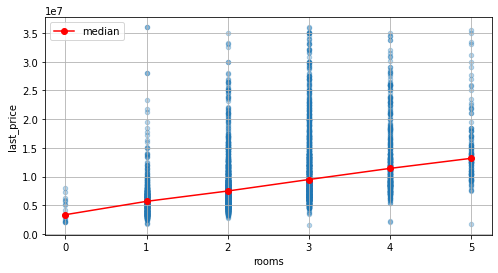

Коэффициент корреляции Пирсона между last_price и rooms в центре города: 0.423


In [77]:
# построим график зависимости функцией center_last_price_scatter()
center_last_price_scatter('rooms', need_median=True)

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и rooms в центре города:', \
      round(spb_realty_center['last_price'].corr(spb_realty_center['rooms']), 3))

* По графику видно, что в среднем стоимость квартиры растёт с увеличением колличества комнат.
* Коэффициент корреляции Пирсона 0.423 также подтверждает положительную зависимость. Значение коэффициента низкое, зависимость между параметрами достаточно слабая.
* Аналогичная зависимость выявлена ранее для квартир по всему датасету.

#### Зависимость цены от этажа

<AxesSubplot:xlabel='floor_category'>

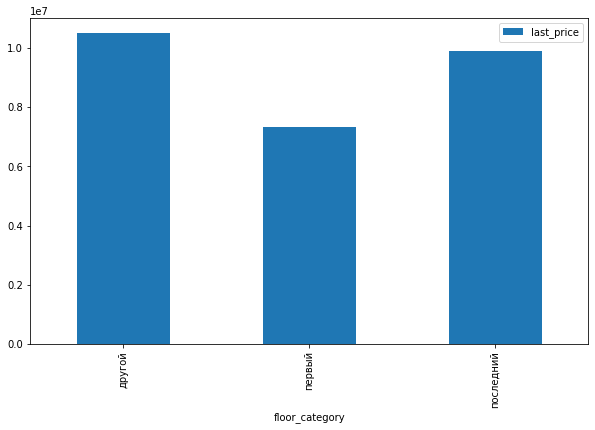

In [78]:
#Построим график методом plot()
(spb_realty_center
    .pivot_table(index='floor_category', values='last_price', aggfunc='mean')
    .plot(kind='bar', y='last_price', figsize=(10,6))
)

* По графику видно, что квартиры расположенные последних этажах стоят дешевле, чем квартиры расположенные на других этажах, а на первом этаже самые дешевые квартиры, так же как и по всему датасету в целом.

#### Зависимость цены от удалённости от центра

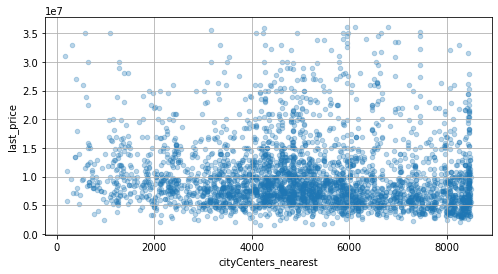

Коэффициент корреляции Пирсона между last_price и cityCenters_nearest: -0.101


In [79]:
# построим график функцией last_price_scatter()
center_last_price_scatter('cityCenters_nearest')

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и cityCenters_nearest:', \
      round(spb_realty_center['last_price'].corr(spb_realty_center['cityCenters_nearest']), 3))

* Коэффициент корреляции Пирсона для квартир в центре -0.101, немного меньше по абсолютному значению, чем для квартир по всему датасету (-0.332). Зависимость между удалённостью от центра и ценой за квартиру немного выше у квартир по всему датасету. Но для квартир в центре данных не очень много, информация может быть недостоверной.

#### Зависимость цены от даты размещения

Рассмотрим зависимость `last_price` от `publish_year`.

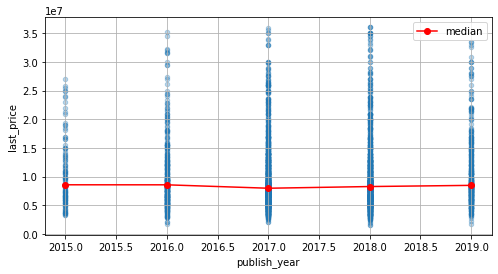

In [80]:
# построим график функцией last_price_scatter()
center_last_price_scatter('publish_year', need_median=True)

* По графику видно, что в среднем стоимость квартиры не зависит от года публикации.

**Выводы**


* Изучены параметры квартир: площадь, цена, число комнат, высота потолков. Распределения данных близки к распределению Пуассона.
* Аномальные данные выявлены, неправдоподобные выбросы удалены.
* Изучено время продажи квартир. Распределение близко к Распределению Пуассона. Аномальных пиков в гистограмме не выявлено. Данные сильно смещены влево (среднее значение в 2 раза больше медианного). Бльшинство квартир продаётся за 45-232 дней. Время продажи меньше 4 дней и больше 500 дней можно считать необычными выбросами.
* Проанализированы факторы, влияющие на стоимость квартиры. Наибольшую корреляцию показали: общая площадь `total_area`, колличество комнат `rooms`, удалённость от центра города `cityCenters_nearest`.
* Проанализирована стоимость квадратного метра в различных районах. Самым дорогим оказался Санкт-Петербург (111613.56), самая дешёвая стоимость квадратного метра в Выборге (58361.63).
* Проанализирована зависимость цены за квадратный метр от расстояния до центра города в Санкт-Петербурге. Граница центрального района около 8 км.
* Рассмотрены факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга. Отмечена общая повышенная стоимость квартир в центральном районе. В остальном корреляции не сильно отличаются. Замечена повышеная цена за квартиру в общем по датасету в период с 2015-2016 гг.

## 5. Общий вывод
**1)** Данные в таблице `'real_estate_data.csv'` о продаже квартир содержат много пропущенной информации. Часть информации могла быть утеряна в результате сбоев системы при загрузке/выгрузке данных. Часть информации могла отсутствовать изначально (объявления не были заполнены на 100%). Информация была восстановлена по существующим данным из других параметров, или оставлениа как есть.

**2)** Аномальные/неправдоподобные данные были частично исправлены, исходя из данных таблицы. Небольшие выбросы, не влияющие на общее распределение данных, были удалены. Также типы данных были исправлены, согласно логике хранящейся информации.

**3)** Дополнитеьные параметры (цена квадратного метра, год публикации, категории этажа квартиры и тд) были рассчитаны и добавлены в исходную таблицу для дальнейших исследований.

**4)** Распределения параметров квартир: площадь, цена, число комнат, высота потолков, близки к Пуассоновскому. Аномальных пиков после преобразования данных не замечено.

**5)** Время продажи квартир имеет достаточно большой разброс: 45-232 дней. Выбросами можно считать время меньше 4 дней или больше 500. Это может говорить о нестабильности рынка недвижимости.

**6)** На стоимость квартиры больше всего влияют параметры: общая площадь, колличество комнат, удалённость от центра. Также замечен спад цен на недвижимость с 2016 года (особенно для квартир в центральном районе Санкт-Петербурга).

**7)** Проанализирована стоимость квадратного метра в различных районах. Самым дорогим оказался Санкт-Петербург (111613.56), самая дешёвая стоимость квадратного метра в Выборге (58361.63).

**8)** Судя по изменению стоимости квартир за квадратный метр, граница центрального района Санкт-петербурга около 8 км.

**9)** Факторы, влияющие на стоимость квартир в Санкт-Петербурге, выражены сильнее для города в целом, чем для его центрального района (коэффициенты корреляции меньше для центрального района). Но отличия невелики. Это может быть обусловлено общей повышенной стоимостью квартир в центральном районе.

<div class="alert alert-info"> <b>Комментарий студента:</b> Евгений, исправила критичные ошибки, к датасету вернулись 50% данных) Также приняла во внимание твои комментарии. </div>